In [5]:
library(phyloseq)
library(ggplot2)
library(vegan)
library(readr)
library(data.table)
library(dplyr)
library(stats)
library(ggpubr)
library(dunn.test)

In [6]:
cadaver_5krare = readRDS("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/RDSfiles/all_cohorts_cadaver_5krare.rds")


### Alpha Diversity

In [7]:
Ita = subset_samples(cadaver_5krare, Location=="Italy")
Fin = subset_samples(cadaver_5krare, Location=="Finland")
USA = subset_samples(cadaver_5krare, Location=="USA")

Liver = subset_samples(cadaver_5krare, Organ=="Liver")

In [8]:
sample_tab = read.csv("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/final_biom/all_cadaver_metadata.csv")
colnames(sample_tab)[1] <- "SampleID"

#### Italy

In [41]:
#By Manner of Death (MOD)

sha = estimate_richness(na.omit(Ita), split = TRUE, measures = "Shannon")
sha$SampleID = rownames(sha)

dfsha = merge(sha, sample_tab, on="SampleID")

ordsha = sha %>% group_by("MOD") %>%
    summarize(med.sha = median(Shannon)) %>%
    arrange(desc(med.sha)) %>%
    magrittr::extract2("MOD")

stats.sha = dfsha %>%
    group_by(MOD) %>%
    summarize(median = median(Shannon), 
              mean = mean(Shannon),
              sd = sd(Shannon),
              sem = sd(Shannon/sqrt(length(Shannon)))) #%>%
    #arrange(-desc(mean))
stats.sha

#CHECK FOR SIGNIFICANCE
stats.krusk = kruskal.test(Shannon~MOD, data=dfsha)
stats.krusk

#POST-HOC ANALYSIS
dunn = dunn.test(dfsha$Shannon, g=dfsha$MOD, method="bonferroni")
dunn

MOD,median,mean,sd,sem
Accident,1.752391,1.674098,0.8559869,0.1914045
Homicide,1.599095,1.901403,0.5539906,0.3198466
Natural,1.487406,1.512661,0.8825012,0.1801398
Suicide,1.987182,2.023714,1.0718054,0.2972653



	Kruskal-Wallis rank sum test

data:  Shannon by MOD
Kruskal-Wallis chi-squared = 3.7959, df = 3, p-value = 0.2844


  Kruskal-Wallis rank sum test

data: x and group
Kruskal-Wallis chi-squared = 3.7959, df = 3, p-value = 0.28


                           Comparison of x by group                            
                                 (Bonferroni)                                  
Col Mean-|
Row Mean |   Accident   Homicide    Natural
---------+---------------------------------
Homicide |  -0.602680
         |     1.0000
         |
 Natural |   0.729699   0.970113
         |     1.0000     0.9960
         |
 Suicide |  -1.162773  -0.064182  -1.844478
         |     0.7348     1.0000     0.1953

alpha = 0.05
Reject Ho if p <= alpha/2


$chi2
[1] 3.795895

$Z
[1] -0.60268071  0.72969960  0.97011351 -1.16277379 -0.06418238 -1.84447817

$P
[1] 0.27336056 0.23278691 0.16599496 0.12246065 0.47441250 0.03255674

$P.adjusted
[1] 1.0000000 1.0000000 0.9959697 0.7347639 1.0000000 0.1953405

$comparisons
[1] "Accident - Homicide" "Accident - Natural"  "Homicide - Natural" 
[4] "Accident - Suicide"  "Homicide - Suicide"  "Natural - Suicide"

In [42]:
#Sort by SI

avg <- aggregate(Shannon ~ MOD, data = dfsha, mean)
dfsha$MOD <-factor(dfsha$MOD, levels=avg[order(avg$Shannon), "MOD"])

png 
  2

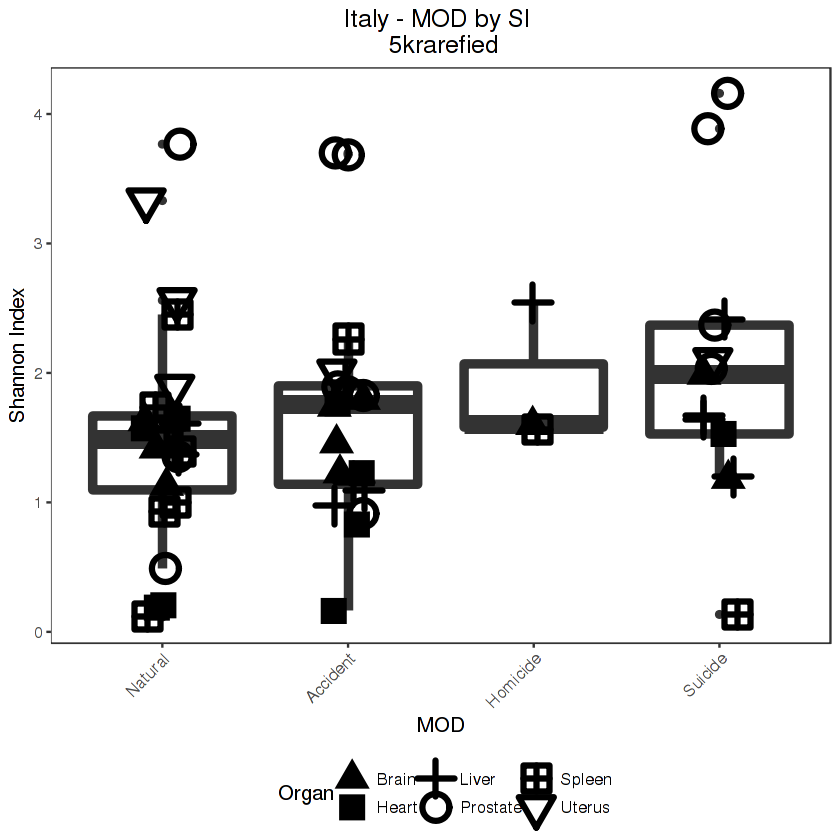

In [43]:
p = ggplot(na.omit(dfsha), aes(x = MOD, y = Shannon)) + ggtitle("Italy - MOD by SI \n 5krarefied")

p = p + geom_boxplot(lwd=2) + ylab("Shannon Index")

p = p + geom_point(size = 6,alpha=1,stroke=2,
                   position = position_jitter(h = 0, w = 0.1), aes(shape=Organ)) +
                   scale_shape_manual(values=c(17,15,3,1,12,6))

p = p + theme_bw() + theme(text=element_text(size=12, color="black",family="Times New Roman"),
                           legend.key = element_blank(),
                           axis.text.x = element_text(angle = 45, hjust = 1),
                           plot.title = element_text(hjust = 0.5),
                           legend.position = "bottom",
                           #axis.title.y=element_blank(),
                           panel.grid.major = element_blank(),
                           panel.grid.minor = element_blank())

p

png('Italy_MOD_shannon.png', width=10, height=10, units='in', res=300)
plot(p)
dev.off()

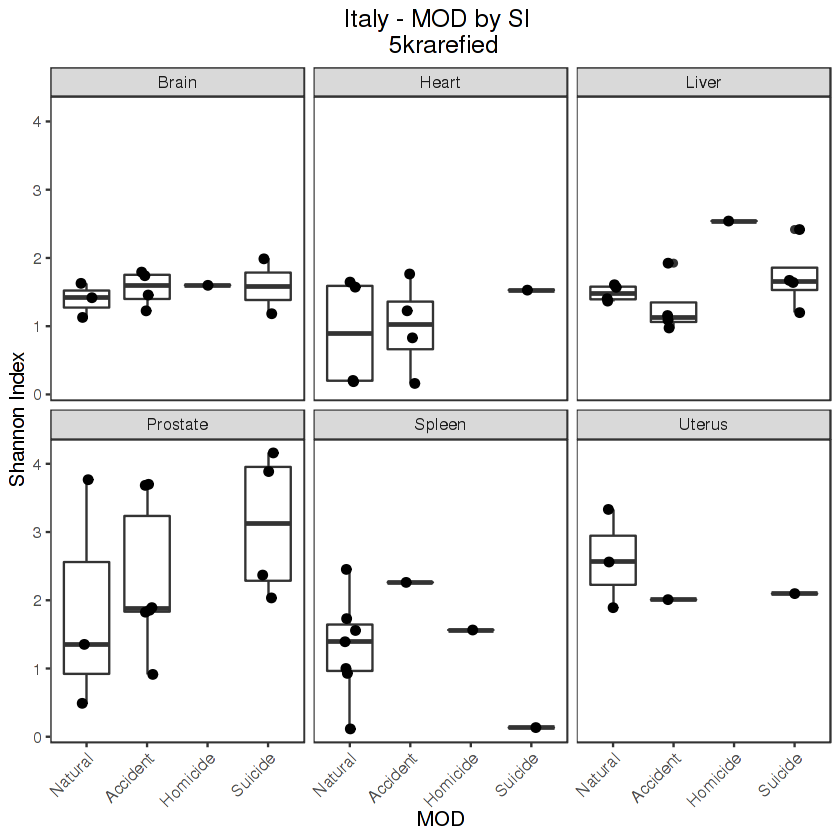

In [10]:
#Facet wrap by organ

p = ggplot(na.omit(dfsha), aes(x = MOD, y = Shannon)) + ggtitle("Italy - MOD by SI \n 5krarefied")

p = p + geom_boxplot() + ylab("Shannon Index")

p = p + geom_point(size = 2,alpha=1,
                   position = position_jitter(h = 0, w = 0.1))

p = p + theme_bw() + theme(text=element_text(size=12, color="black",family="Times New Roman"),
                           legend.key = element_blank(),
                           axis.text.x = element_text(angle = 45, hjust = 1),
                           plot.title = element_text(hjust = 0.5),
                           legend.position = "bottom",
                           #axis.title.y=element_blank(),
                           panel.grid.major = element_blank(),
                           panel.grid.minor = element_blank())

p = p + facet_wrap(~Organ)

p

#### USA

In [44]:
#By MOD

sha = estimate_richness(na.omit(USA), split = TRUE, measures = "Shannon")
sha$SampleID = rownames(sha)

dfsha = merge(sha, sample_tab, on="SampleID")

ordsha = sha %>% group_by("MOD") %>%
    summarize(med.sha = median(Shannon)) %>%
    arrange(desc(med.sha)) %>%
    magrittr::extract2("MOD")

stats.sha = dfsha %>%
    group_by(MOD) %>%
    summarize(median = median(Shannon), 
              mean = mean(Shannon),
              sd = sd(Shannon),
              sem = sd(Shannon/sqrt(length(Shannon)))) #%>%
    #arrange(-desc(mean))
stats.sha

#CHECK FOR SIGNIFICANCE
stats.krusk = kruskal.test(Shannon~MOD, data=dfsha)
stats.krusk

#POST-HOC ANALYSIS
dunn = dunn.test(dfsha$Shannon, g=dfsha$MOD, method="bonferroni")
dunn

MOD,median,mean,sd,sem
Accident,0.7951439,1.4039454,1.4520701,0.2607995
Homicide,2.3843415,2.7217370,0.8529145,0.2843048
Natural,0.4092834,0.9714349,0.9887008,0.1835971
Suicide,3.4940321,3.4649682,0.4062121,0.1172633
NA,2.9477159,2.9477159,0.5956296,0.4211737



	Kruskal-Wallis rank sum test

data:  Shannon by MOD
Kruskal-Wallis chi-squared = 28.427, df = 3, p-value = 2.954e-06


  Kruskal-Wallis rank sum test

data: x and group
Kruskal-Wallis chi-squared = 28.4273, df = 3, p-value = 0


                           Comparison of x by group                            
                                 (Bonferroni)                                  
Col Mean-|
Row Mean |   Accident   Homicide    Natural
---------+---------------------------------
Homicide |  -2.449133
         |     0.0430
         |
 Natural |   0.845161   3.002570
         |     1.0000    0.0080*
         |
 Suicide |  -4.134051  -1.084416  -4.730945
         |    0.0001*     0.8345    0.0000*

alpha = 0.05
Reject Ho if p <= alpha/2


$chi2
[1] 28.42731

$Z
[1] -2.4491331  0.8451614  3.0025707 -4.1340517 -1.0844161 -4.7309459

$P
[1] 7.160026e-03 1.990104e-01 1.338549e-03 1.782116e-05 1.390902e-01
[6] 1.117381e-06

$P.adjusted
[1] 4.296015e-02 1.000000e+00 8.031294e-03 1.069270e-04 8.345411e-01
[6] 6.704283e-06

$comparisons
[1] "Accident - Homicide" "Accident - Natural"  "Homicide - Natural" 
[4] "Accident - Suicide"  "Homicide - Suicide"  "Natural - Suicide"

In [45]:
#Sort by SI

avg <- aggregate(Shannon ~ MOD, data = dfsha, mean)
dfsha$MOD <-factor(dfsha$MOD, levels=avg[order(avg$Shannon), "MOD"])

png 
  2

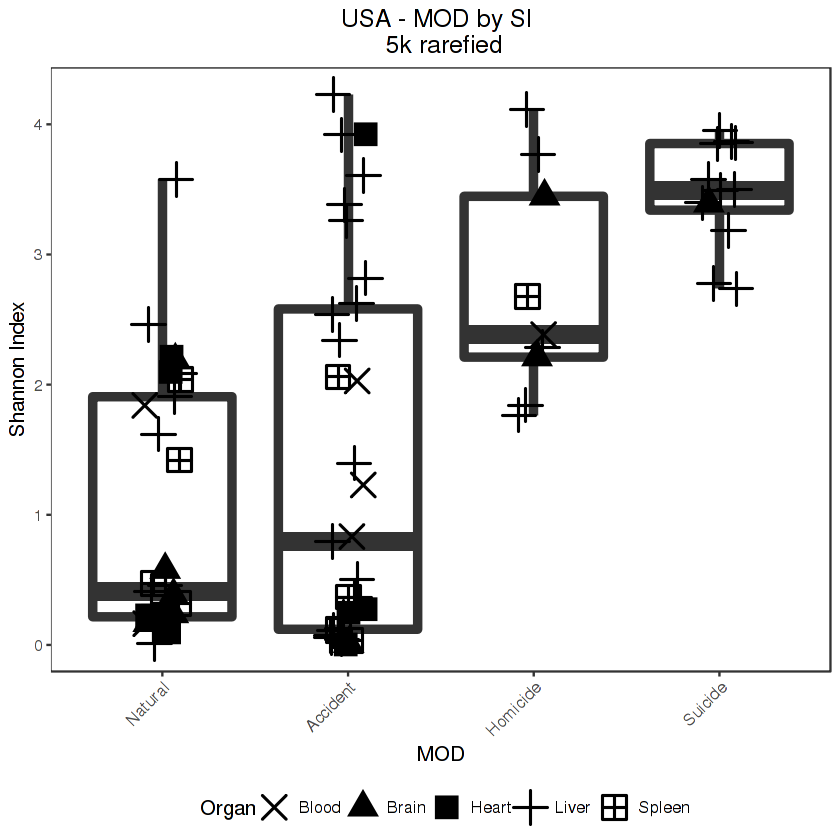

In [46]:
p = ggplot(na.omit(dfsha), aes(x = MOD, y = Shannon)) + ggtitle("USA - MOD by SI \n 5k rarefied")

p = p + geom_boxplot(lwd=2) + ylab("Shannon Index")

p = p + geom_point(size = 6,alpha=1,stroke=1,
                   position = position_jitter(h = 0, w = 0.1), aes(shape=Organ)) +
                   scale_shape_manual(values=c(4,17,15,3,12))

p = p + theme_bw() + theme(text=element_text(size=12, color="black",family="Times New Roman"),
                           legend.key = element_blank(),
                           axis.text.x = element_text(angle = 45, hjust = 1),
                           plot.title = element_text(hjust = 0.5),
                           legend.position = "bottom",
                           #axis.title.y=element_blank(),
                           panel.grid.major = element_blank(),
                           panel.grid.minor = element_blank())

p

png('USA_MOD_shannon.png', width=10, height=10, units='in', res=300)
plot(p)
dev.off()

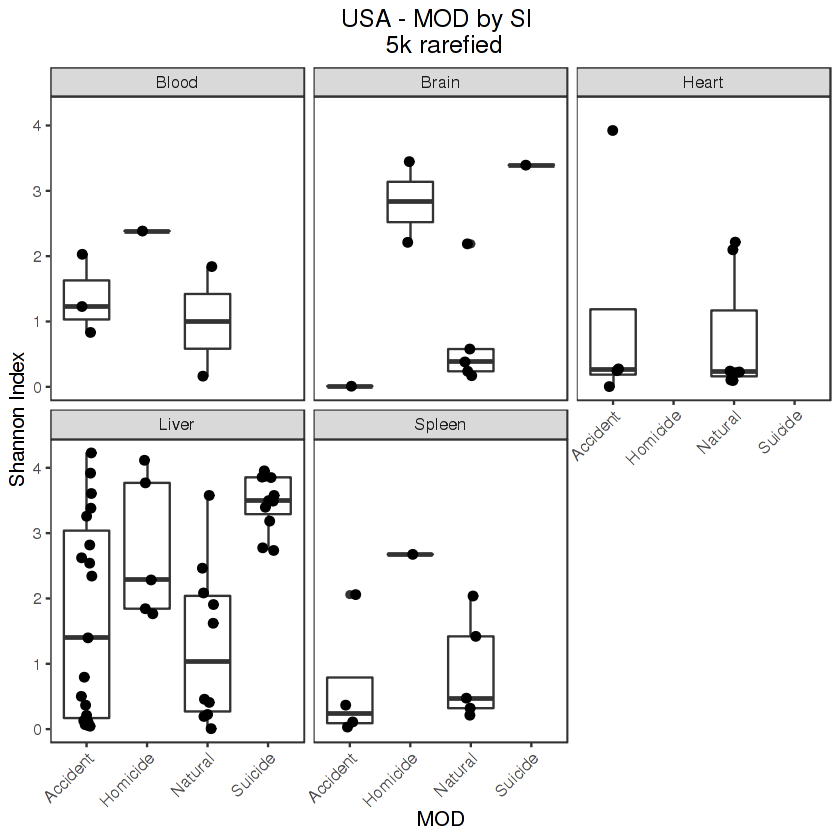

In [13]:
#Facet wrap by organ

p = ggplot(na.omit(dfsha), aes(x = MOD, y = Shannon)) + ggtitle("USA - MOD by SI \n 5k rarefied")

p = p + geom_boxplot() + ylab("Shannon Index")

p = p + geom_point(fill = "Black", size = 2,alpha=1,
                   position = position_jitter(h = 0, w = 0.1)) 

p = p + theme_bw() + theme(text=element_text(size=12, color="black",family="Times New Roman"),
                           legend.key = element_blank(),
                           axis.text.x = element_text(angle = 45, hjust = 1),
                           plot.title = element_text(hjust = 0.5),
                           legend.position = "bottom",
                           #axis.title.y=element_blank(),
                           panel.grid.major = element_blank(),
                           panel.grid.minor = element_blank())

p = p + facet_wrap(~Organ)

p

### Liver only to compare with Finland (for which only liver was sampled)

In [47]:
#Liver only, all three MODs (Finland, Italy, USA)

sha = estimate_richness(na.omit(Fin), split = TRUE, measures = "Shannon")
sha$SampleID = rownames(sha)

dfsha = merge(sha, sample_tab, on="SampleID")

ordsha = sha %>% group_by("MOD") %>%
    summarize(med.sha = median(Shannon)) %>%
    arrange(desc(med.sha)) %>%
    magrittr::extract2("MOD")

stats.sha = dfsha %>%
    group_by(MOD, Location) %>%
    summarize(median = median(Shannon), 
              mean = mean(Shannon),
              sd = sd(Shannon),
              sem = sd(Shannon/sqrt(length(Shannon)))) #%>%
    #arrange(-desc(mean))
stats.sha

#CHECK FOR SIGNIFICANCE
stats.krusk = kruskal.test(Shannon~MOD, data=dfsha)
stats.krusk

#POST-HOC ANALYSIS
dunn = dunn.test(dfsha$Shannon, g=dfsha$MOD, method="bonferroni")
dunn

MOD,Location,median,mean,sd,sem
Accident,Finland,0.4045755,0.5350176,0.4595856,0.1876251
Natural,Finland,0.4650796,0.5791563,0.4904895,0.1415921
Suicide,Finland,0.5272819,0.5272819,0.6973845,0.4931253



	Kruskal-Wallis rank sum test

data:  Shannon by MOD
Kruskal-Wallis chi-squared = 0.028571, df = 2, p-value = 0.9858


  Kruskal-Wallis rank sum test

data: x and group
Kruskal-Wallis chi-squared = 0.0286, df = 2, p-value = 0.99


                           Comparison of x by group                            
                                 (Bonferroni)                                  
Col Mean-|
Row Mean |   Accident    Natural
---------+----------------------
 Natural |  -0.112687
         |     1.0000
         |
 Suicide |   0.069006   0.147542
         |     1.0000     1.0000

alpha = 0.05
Reject Ho if p <= alpha/2


$chi2
[1] 0.02857143

$Z
[1] -0.11268723  0.06900656  0.14754222

$P
[1] 0.4551393 0.4724922 0.4413520

$P.adjusted
[1] 1 1 1

$comparisons
[1] "Accident - Natural" "Accident - Suicide" "Natural - Suicide"

In [48]:
#Sort by SI

avg <- aggregate(Shannon ~ MOD, data = dfsha, median)
dfsha$MOD <-factor(dfsha$MOD, levels=avg[order(avg$Shannon), "MOD"])

png 
  2

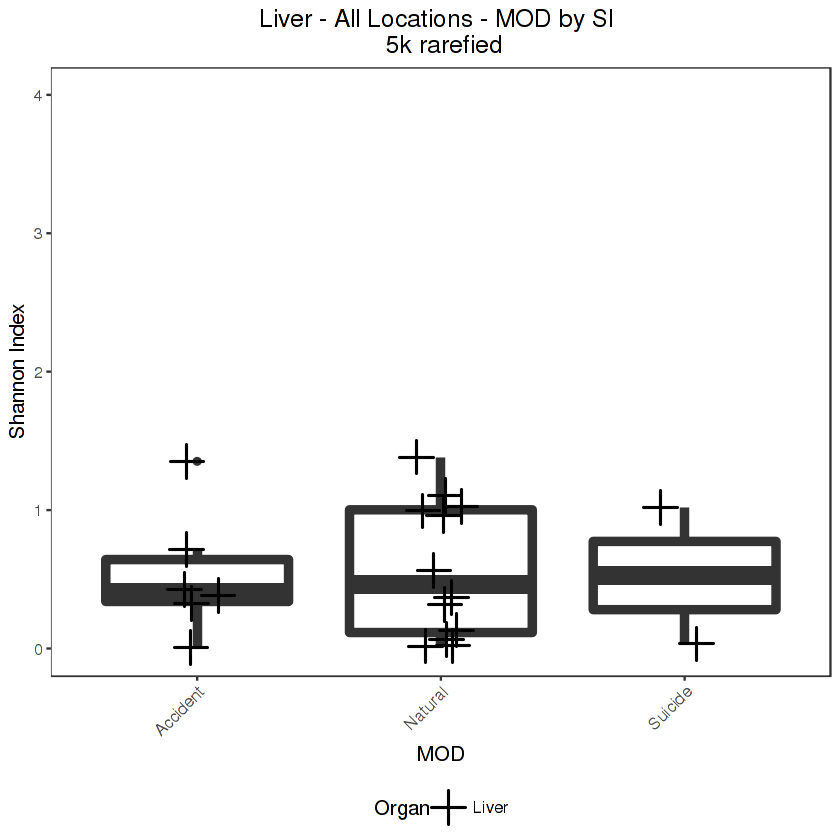

In [51]:
p = ggplot(na.omit(dfsha), aes(x = MOD, y = Shannon)) + ggtitle("Liver - All Locations - MOD by SI \n 5k rarefied")

p = p + geom_boxplot(lwd=2) + ylab("Shannon Index") + ylim(0,4)

p = p + geom_point(size = 6,alpha=1,stroke=1,
                   position = position_jitter(h = 0, w = 0.1), aes(shape=Organ)) +
                    scale_shape_manual(values=c(3))
                                                
p = p + theme_bw() + theme(text=element_text(size=12, color="black",family="Times New Roman"),
                           legend.key = element_blank(),
                           axis.text.x = element_text(angle = 45, hjust = 1),
                           plot.title = element_text(hjust = 0.5),
                           legend.position = "bottom",
                           #axis.title.y=element_blank(),
                           panel.grid.major = element_blank(),
                           panel.grid.minor = element_blank())

#p = p + facet_wrap(~Location)

p

png('Finland_MOD_shannon.png', width=7.5, height=10, units='in', res=300)
plot(p)
dev.off()